In [191]:
import random
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import  LogisticRegression
import matplotlib.pyplot as plt
import h5py
from sklearn.metrics import roc_auc_score, roc_curve, auc
from matplotlib.pyplot import yticks, xticks, subplots, set_cmap
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pickle
import gc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import calendar
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 10000)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import ensemble
import gc
from sklearn.model_selection import cross_val_score
import numpy as np
h = .02  # step size in the mesh
import logging

In [139]:

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logger = logging.getLogger('CHURN_PRED')
logging.basicConfig(filename='log_leads.log',level=logging.DEBUG)
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)
logger.info('logger established')

2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established
2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established
2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established
2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established
2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established
2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established
2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established
2020-12-18 01:50:31,313 - CHURN_PRED - INFO - logger established


In [176]:

names = ["XGB","GBM","Neural Net","Naive Bayes","Decision Tree", "Random Forest","Nearest Neighbors","LogisticRegression"]

classifiers = [XGBClassifier(max_delta_step=3, max_depth=7, max_features=3,
              min_samples_split=2, n_estimators=500, scale_pos_weight=10),
               GradientBoostingClassifier(n_estimators=100,random_state=0,verbose=1),
    MLPClassifier(alpha=0.00001,max_iter=27577,activation='logistic',batch_size=100,verbose=True,random_state=0),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=7, n_estimators=100,min_samples_split=2, max_features=3, class_weight='balanced'),
    KNeighborsClassifier(2),
    LogisticRegression(penalty='l2',class_weight='balanced', random_state=0, 
                                        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0,
                                        warm_start=False, n_jobs=None, l1_ratio=None)]
#import csv
lead_data=pd.read_csv('Leads.csv')
print(lead_data.describe())
print(lead_data.info())
print(lead_data.columns)



         Lead_Number  Do_Not_Email  Do_Not_Call    Converted  TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit       Search  Newspaper_Article  X_Education_Forums    Newspaper  Digital_Advertisement  Through_Recommendations  Asymmetrique_Activity_Index  Asymmetrique_Profile_Index  Asymmetrique_Activity_Score  Asymmetrique_Profile_Score  A_free_copy_of_Mastering_The_Interview      how_long
count    9240.000000   9240.000000  9240.000000  9240.000000  9240.000000                  9240.000000           9240.000000  9240.000000        9240.000000         9240.000000  9240.000000            9240.000000              9240.000000                  9240.000000                 9240.000000                  9240.000000                 9240.000000                             9240.000000   9240.000000
mean   617188.435606      0.079437     0.000216     0.385390    15.107792                   487.698268              2.365233     0.001515           0.000216            0.000108     0.00010

In [141]:

categorical_vars= lead_data.select_dtypes(exclude=['float64', 'int64']).columns
numerical_vars = lead_data.select_dtypes(include=['float64', 'int64']).columns

for cat in categorical_vars.tolist():
    print(cat)
    print(lead_data[cat].value_counts(dropna=False))
    
cat_to_drop=['Magazine','Get updates on DM Content','Update me on Supply Chain Content',
             'I agree to pay the amount through cheque','Receive More Updates About Our Courses']
lead_data.drop(columns=cat_to_drop,axis=1,inplace=True)
categorical_vars=categorical_vars.drop(cat_to_drop)
categories_yes_no=['Do Not Email','Do Not Call','Search','Newspaper Article',
                   'X Education Forums','Newspaper','Digital Advertisement',
                   'Through Recommendations','A free copy of Mastering The Interview']
categories_label=['Asymmetrique Activity Index','Asymmetrique Profile Index']
dict_ordinal={'01.High':1,'02.Medium':2,'03.Low':3}
dict={'Yes':1,'No':0}

Prospect ID
9c8f2a7b-e6f1-4b64-8959-8d3cd009228c    1
c2c05e3a-7db3-4f6d-9d2f-3acb76e81cb4    1
0583d041-7545-4f25-9708-84502057948f    1
5b7468fb-dff7-471c-813c-a951bd5da35d    1
e467041f-deb9-40a6-a116-705bfcf27fce    1
                                       ..
46ec38d7-3e9d-4a24-adb9-4ff4d4549be8    1
980a49f1-28f6-4936-a6e1-2348cb21b58e    1
70d2b284-1383-4bf8-b35a-8e9847966234    1
83e300f3-3107-41b9-a083-52c5966a3118    1
85ea8b33-b730-4285-acd5-e423abd5f24b    1
Name: Prospect ID, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
goog

In [142]:
for cat in categories_yes_no:
    print(cat)
    lead_data[cat]=lead_data[cat].replace(dict)
   
#Checking percentage of null values present in training dataset 
missing_num= lead_data[lead_data.columns].isna().sum().sort_values(ascending=False)
missing_perc= (lead_data[lead_data.columns].isna().sum()/len(lead_data)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_df= missing[missing['Percentage']>0]
print(missing_df)

Do Not Email
Do Not Call
Search
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
A free copy of Mastering The Interview
                                               Total  Percentage
Lead Quality                                    4767   51.590909
Asymmetrique Profile Score                      4218   45.649351
Asymmetrique Activity Score                     4218   45.649351
Asymmetrique Profile Index                      4218   45.649351
Asymmetrique Activity Index                     4218   45.649351
Tags                                            3353   36.287879
What matters most to you in choosing a course   2709   29.318182
Lead Profile                                    2709   29.318182
What is your current occupation                 2690   29.112554
Country                                         2461   26.634199
How did you hear about X Education              2207   23.885281
Specialization                                  1438   1

In [143]:
#----------------------------missing value imputations using mean, mode or creating a category 'other' in some cases
lead_data['Tags'].fillna('Other',inplace=True)
lead_data['Lead Quality'].fillna('Other',inplace=True)
lead_data['Lead Profile'].fillna('Select',inplace=True)
lead_data['What matters most to you in choosing a course'].fillna(lead_data['What matters most to you in choosing a course'].mode()[0],inplace=True)
lead_data['What is your current occupation'].fillna(lead_data['What is your current occupation'].mode()[0],inplace=True)
lead_data['Country'].fillna(lead_data['Country'].mode()[0],inplace=True)
lead_data['City'].fillna(lead_data['City'].mode()[0],inplace=True)
lead_data['Specialization'].fillna(lead_data['Specialization'].mode()[0],inplace=True)
lead_data['How did you hear about X Education'].fillna(lead_data['How did you hear about X Education'].mode()[0],inplace=True)
lead_data['Last Activity'].fillna(lead_data['Last Activity'].mode()[0],inplace=True)
lead_data['Lead Source'].fillna(lead_data['Lead Source'].mode()[0],inplace=True)




lead_data['Asymmetrique Profile Index'].fillna(lead_data['Asymmetrique Profile Index'].mode()[0],inplace=True)
lead_data['Asymmetrique Activity Index'].fillna(lead_data['Asymmetrique Activity Index'].mode()[0],inplace=True)
lead_data['Asymmetrique Profile Score'].fillna(round(lead_data['Asymmetrique Profile Score'].mean()),inplace=True)
lead_data['Asymmetrique Activity Score'].fillna(round(lead_data['Asymmetrique Activity Score'].mean()),inplace=True)

#encoding ordered categorical variables to numeric
for cat in categories_label:
    print(cat)
    lead_data[cat]=lead_data[cat].replace(dict_ordinal)
# missing value imputation of 'TotalVisits' and 'Page Views Per Visit'
#creating 4 segments ( <q1, q1-q2, q2-q3,>q3) using quartiles of 'Total Time Spent on Website' and finding mean 
# of the variable which has to be imputed in these segments 
#and then replaning missing values of mvariable to be imputed with these mean values
Q1 = lead_data['Total Time Spent on Website'].quantile(0.25)
Q2 = lead_data['Total Time Spent on Website'].quantile(0.5)
Q3 = lead_data['Total Time Spent on Website'].quantile(0.75)

q1_total_visits=round(lead_data[lead_data['Total Time Spent on Website']<Q1]['Total Time Spent on Website'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']<Q1) & (lead_data['TotalVisits'].isnull()),'TotalVisits']=q1_total_visits
q2_total_visits=round(lead_data[lead_data['Total Time Spent on Website']<Q2]['Total Time Spent on Website'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']<Q2) & (lead_data['TotalVisits'].isnull()),'TotalVisits']=q2_total_visits
q3_total_visits=round(lead_data[lead_data['Total Time Spent on Website']<Q3]['Total Time Spent on Website'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']<Q3) & (lead_data['TotalVisits'].isnull()),'TotalVisits']=q3_total_visits
q4_total_visits=round(lead_data[lead_data['Total Time Spent on Website']>=Q3]['Total Time Spent on Website'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']>=Q3) & (lead_data['TotalVisits'].isnull()),'TotalVisits']=q4_total_visits

q1_page_visits=round(lead_data[lead_data['Total Time Spent on Website']<Q1]['Page Views Per Visit'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']<Q1) & (lead_data['Page Views Per Visit'].isnull()),'Page Views Per Visit']=q1_page_visits
q2_page_visits=round(lead_data[lead_data['Total Time Spent on Website']<Q2]['Page Views Per Visit'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']<Q2) & (lead_data['Page Views Per Visit'].isnull()),'Page Views Per Visit']=q2_page_visits
q3_page_visits=round(lead_data[lead_data['Total Time Spent on Website']<Q3]['Page Views Per Visit'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']<Q3) & (lead_data['Page Views Per Visit'].isnull()),'Page Views Per Visit']=q3_page_visits
q4_page_visits=round(lead_data[lead_data['Total Time Spent on Website']>=Q3]['Page Views Per Visit'].mean())
lead_data.loc[(lead_data['Total Time Spent on Website']>=Q3) & (lead_data['Page Views Per Visit'].isnull()),'Page Views Per Visit']=q4_page_visits
#-------------------missing values imputation done
#--------------------------------------------------------

Asymmetrique Activity Index
Asymmetrique Profile Index


In [144]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [145]:
def getClasswiseStats(df_dat,classVariable, columnsToGetStatsFor):
    '''
    Function to get the classwise (classVariable ) 
    descriptive stats for the columns (columnsToGetStatsFor)
    of the dataframe passed (df_dat).
    '''
    #df_dat_All_stats = df_dat.groupby(classVariable).describe(include = 'all').T
    
    df_stats = df_dat.groupby(classVariable)[columnsToGetStatsFor].describe().T
    return df_stats
categorical_vars= lead_data.select_dtypes(exclude=['float64', 'int64']).columns
numerical_vars = lead_data.select_dtypes(include=['float64', 'int64']).columns
df_stats_categorical_vars=getClasswiseStats(lead_data,'Converted',categorical_vars)
print(df_stats_categorical_vars)
df_stats_numerical_vars=getClasswiseStats(lead_data,'Converted',numerical_vars)
print(df_stats_numerical_vars)



Converted                                                                                0                                     1
Prospect ID                                   count                                   5679                                  3561
                                              unique                                  5679                                  3561
                                              top     9c8f2a7b-e6f1-4b64-8959-8d3cd009228c  8ed7528c-c4a0-4e52-b1b4-a56d63f81154
                                              freq                                       1                                     1
Lead Origin                                   count                                   5679                                  3561
                                              unique                                     4                                     5
                                              top                  Landing Page Submission       

In [146]:
def cramers_v(x, y):
    '''
    returns Square root of Cramer's V to suggest
    intercorrelation of two discrete 
    variables x and y. Cramér's V is computed by taking 
    the square root of the chi-squared statistic divided 
    by the sample size and the minimum dimension minus 1

    Cramér's V varies from 0 (corresponding to no association 
    between the variables) to 1 (complete association) 
    and can reach 1 only when each variable is completely 
    determined by the other.
    '''
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    cal=np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    return cal

#----------------------- Check Cramer's V for the categorical vars--------------------
for i in categorical_vars:
    # Strength of association between the categorical column & Converted
    val = cramers_v(lead_data[i],lead_data['Converted'])
    print('Coeff for {} = {}'.format(i,val))

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


Coeff for Prospect ID = inf
Coeff for Lead Origin = 0.3254818769324107
Coeff for Lead Source = 0.3357310904279586
Coeff for Last Activity = 0.3920605973015638
Coeff for Country = 0.019185748199640636
Coeff for Specialization = 0.16418786426718882
Coeff for How did you hear about X Education = 0.043905276115606746
Coeff for What is your current occupation = 0.31770119663726826
Coeff for What matters most to you in choosing a course = 0.0
Coeff for Tags = 0.7902990888118169
Coeff for Lead Quality = 0.5906981182380395
Coeff for Lead Profile = 0.40038939686015806
Coeff for City = 0.15308930597713097
Coeff for Last Notable Activity = 0.3803555307475229


In [147]:
def reduceNumOfCategoriesByMaxCategorySize(df_dat, categoryColName):
    '''
    Function to reduce the number of categories for the categoryColName
    in the dataframe df_dat. Number of categories to be combined into OTHERS
    are detected dynamically based on trend in the percent change with respect 
    to previous category when ordered in descending order of counts. 
    
    Categories with decreasing percent change with respect to previous 
    category are kept as is, and categories from 
    the increased percent change onwards are combined into others. 
    
    Returns the df_dat with shrinked categories 
    '''
    df_counts=pd.DataFrame(df_dat[categoryColName].value_counts())
    df_pct_change=df_counts[categoryColName].pct_change(fill_method='ffill').pct_change()
    cat_first_Positive_pct_change=df_pct_change[df_pct_change>0.0].index[0]
    cat_last= df_pct_change.index[-1]

    df_dat.replace(
            df_pct_change[cat_first_Positive_pct_change:cat_last]
            .index.values,'Others', inplace = True)
    return df_dat

#----- Rename less popular categories to others-----------------------------------
print(lead_data['Last Notable Activity'].value_counts())
lead_data['Last Notable Activity']=np.where(lead_data['Last Notable Activity'].isin(['Modified','Email Opened','SMS Sent']),
                                           lead_data['Last Notable Activity'],'Others')
print(lead_data['Last Notable Activity'].value_counts())
print(lead_data['Country'].value_counts())
lead_data=reduceNumOfCategoriesByMaxCategorySize(lead_data,'Country')
print(lead_data['Country'].value_counts())

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64
Modified        3407
Email Opened    2827
SMS Sent        2172
Others           834
Name: Last Notable Activity, dtype: int64
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kon

In [148]:

#-------------------creating difference variables for how long it has been
max_lead_number=lead_data['Lead Number'].max()
lead_data['how_long']=max_lead_number-lead_data['Lead Number']

#replace spaces with '_' in column names
lead_data.columns = lead_data.columns.str.replace(' ','_')
categorical_vars= lead_data.select_dtypes(exclude=['float64', 'int64']).columns
numerical_vars = lead_data.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
#------------------------    DATA VISUALIZATION---------------------------------
def getCategoricalVariableWithTargetViz(data, categorical_vars):
    
    '''
    countplot for categorical variables vs target variable
    '''
    
    for i,cat in enumerate(categorical_vars):
        plt.figure(i)
        plt.figure(figsize=(12,8))
        sns.countplot(x=cat,hue='Converted',data=data)
        plt.xticks(rotation=90) 
        plt.savefig('out/cat/{}.jpeg'.format(cat))
        plt.close()
def getCategoricalVariablePropWithTargetViz(data, categorical_vars):
    
    '''
    proportion for categorical variables vs target variable
    '''
    for i,cat in enumerate(categorical_vars):
        plt.figure(i)
        plt.figure(figsize=(12,8))
        props = data.groupby(cat)['Converted'].value_counts(normalize=True).unstack()
        props.plot(kind='bar', stacked='True') 
        plt.savefig('out/cat/prop_{}.jpeg'.format(cat))
        plt.close()
def getNumericalVariableWithTargetViz(data, numerical_vars):
    
    '''
    distribution for numerical variables vs target variable
    '''
    
    churn_yes = data[data['Converted'] == 1]
    churn_no = data[data['Converted'] == 0]
    for i,cat in enumerate(numerical_vars):
        
        plt.figure(figsize=(12,8))
        plt.figure(i)
        sns.distplot(churn_no[cat],label='0')
        sns.distplot(churn_yes[cat],label='1')
        plt.legend(title='left',loc='best') 
        plt.savefig('out/num_dist/{}.jpeg'.format(cat))
        plt.close()
def plotboxplotsfornumerical(df_dat,numerical_vars):   
    
    churn_yes = df_dat[df_dat['Converted'] == 1]
    churn_no = df_dat[df_dat['Converted'] == 0]
    for i,cat in enumerate(numerical_vars):
        
        plt.figure(figsize=(12,8))
        plt.figure(i)
        fig, ax = plt.subplots()
        ax.set_title(cat)
        ax.boxplot([churn_yes[cat],churn_no[cat]])
        #ax.set_labels(['1','0'])
        plt.savefig('out/boxplot_{}.jpeg'.format(cat))
        plt.close()
        
    
#---------------------    1. Categorical Variables-------------------------------

getCategoricalVariableWithTargetViz(lead_data,categorical_vars)
getCategoricalVariablePropWithTargetViz(lead_data,categorical_vars)


#---------------------     2.Numerical Variables (box plot and distribution)-----
getNumericalVariableWithTargetViz(lead_data,numerical_vars) 
plotboxplotsfornumerical(lead_data,numerical_vars) 

In [150]:
def getTopFeaturesByTreeClassifier(df_dat, numericVariables, classVariable, n):
    '''
     Inbuilt class feature_importances from a tree based classifiers
    '''
    from sklearn.ensemble import ExtraTreesClassifier
    import matplotlib.pyplot as plt
    model = ExtraTreesClassifier(random_state=0)
    model.fit(df_dat[numericVariables],df_dat[classVariable])
    #print(model.feature_importances_) 
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=numericVariables)
    #feat_importances.nlargest(n).plot(kind='barh')
    #plt.show()
    
    feat_importances = pd.DataFrame(model.feature_importances_)
    dfcolumns = pd.DataFrame(numericVariables)

     #concat two dataframes  
    featureScores = pd.concat([dfcolumns,feat_importances],axis=1)
    featureScores.columns = ['TreeClassifier_Variable','TreeClassifier_Score']
    return featureScores.nlargest(n,'TreeClassifier_Score').reset_index(drop=True)
#dropping target variable, and other correlated or unnecessary variables
numerical_vars=numerical_vars.drop(['Converted','Lead_Number'])
numerical_vars=numerical_vars.drop(['Asymmetrique_Activity_Index','Asymmetrique_Profile_Index'])
categorical_vars=categorical_vars.drop(['Prospect_ID'])
#selecting top 10 numerical features
numerical_vars_k=getTopFeaturesByTreeClassifier(lead_data, numerical_vars,'Converted',10)
#selecting top 10 categorical features
l=[]
for i in categorical_vars:
    val = cramers_v(lead_data[i],lead_data['Converted'])
    print('Coeff for {} = {}'.format(i,val))
    l.append((i,val))
l_sorted=sorted(l, key = lambda x: x[1],reverse=True)[0:10]
categorical_vars_k=[i[0] for i in l_sorted][0:10]
numerical_vars_k=numerical_vars_k['TreeClassifier_Variable'].tolist()


lead_data_selected_vars=lead_data[numerical_vars_k+categorical_vars_k]



Coeff for Lead_Origin = 0.3254818769324107
Coeff for Lead_Source = 0.3357310904279586
Coeff for Last_Activity = 0.3920605973015638
Coeff for Country = 0.032536827210824196
Coeff for Specialization = 0.16418786426718882
Coeff for How_did_you_hear_about_X_Education = 0.043905276115606746
Coeff for What_is_your_current_occupation = 0.31770119663726826
Coeff for What_matters_most_to_you_in_choosing_a_course = 0.0
Coeff for Tags = 0.7902990888118169
Coeff for Lead_Quality = 0.5906981182380395
Coeff for Lead_Profile = 0.40038939686015806
Coeff for City = 0.15308930597713097
Coeff for Last_Notable_Activity = 0.3706503741216602


In [151]:
numerical_vars_k

['how_long',
 'Total_Time_Spent_on_Website',
 'Asymmetrique_Activity_Score',
 'TotalVisits',
 'Page_Views_Per_Visit',
 'Asymmetrique_Profile_Score',
 'Do_Not_Email',
 'A_free_copy_of_Mastering_The_Interview',
 'Search',
 'Through_Recommendations']

In [152]:
categorical_vars_k

['Tags',
 'Lead_Quality',
 'Lead_Profile',
 'Last_Activity',
 'Last_Notable_Activity',
 'Lead_Source',
 'Lead_Origin',
 'What_is_your_current_occupation',
 'Specialization',
 'City']

In [153]:
#One Hot Encoding of the Categorical features 
ls=[]
list_df=[]
for i in categorical_vars_k:
    locals()['lead_data_selected_vars_' + str(i)]=pd.get_dummies(lead_data_selected_vars[i],prefix=i)
    ls.append(locals()['lead_data_selected_vars_' + str(i)])
lead_data_selected_vars.drop(categorical_vars_k,axis=1,inplace=True)
list_df.append(lead_data_selected_vars)
list_df.extend(ls)
lead_data_selected_vars=pd.concat(list_df,axis=1) 

C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
lead_data_selected_vars.reset_index(inplace=True,drop=True)

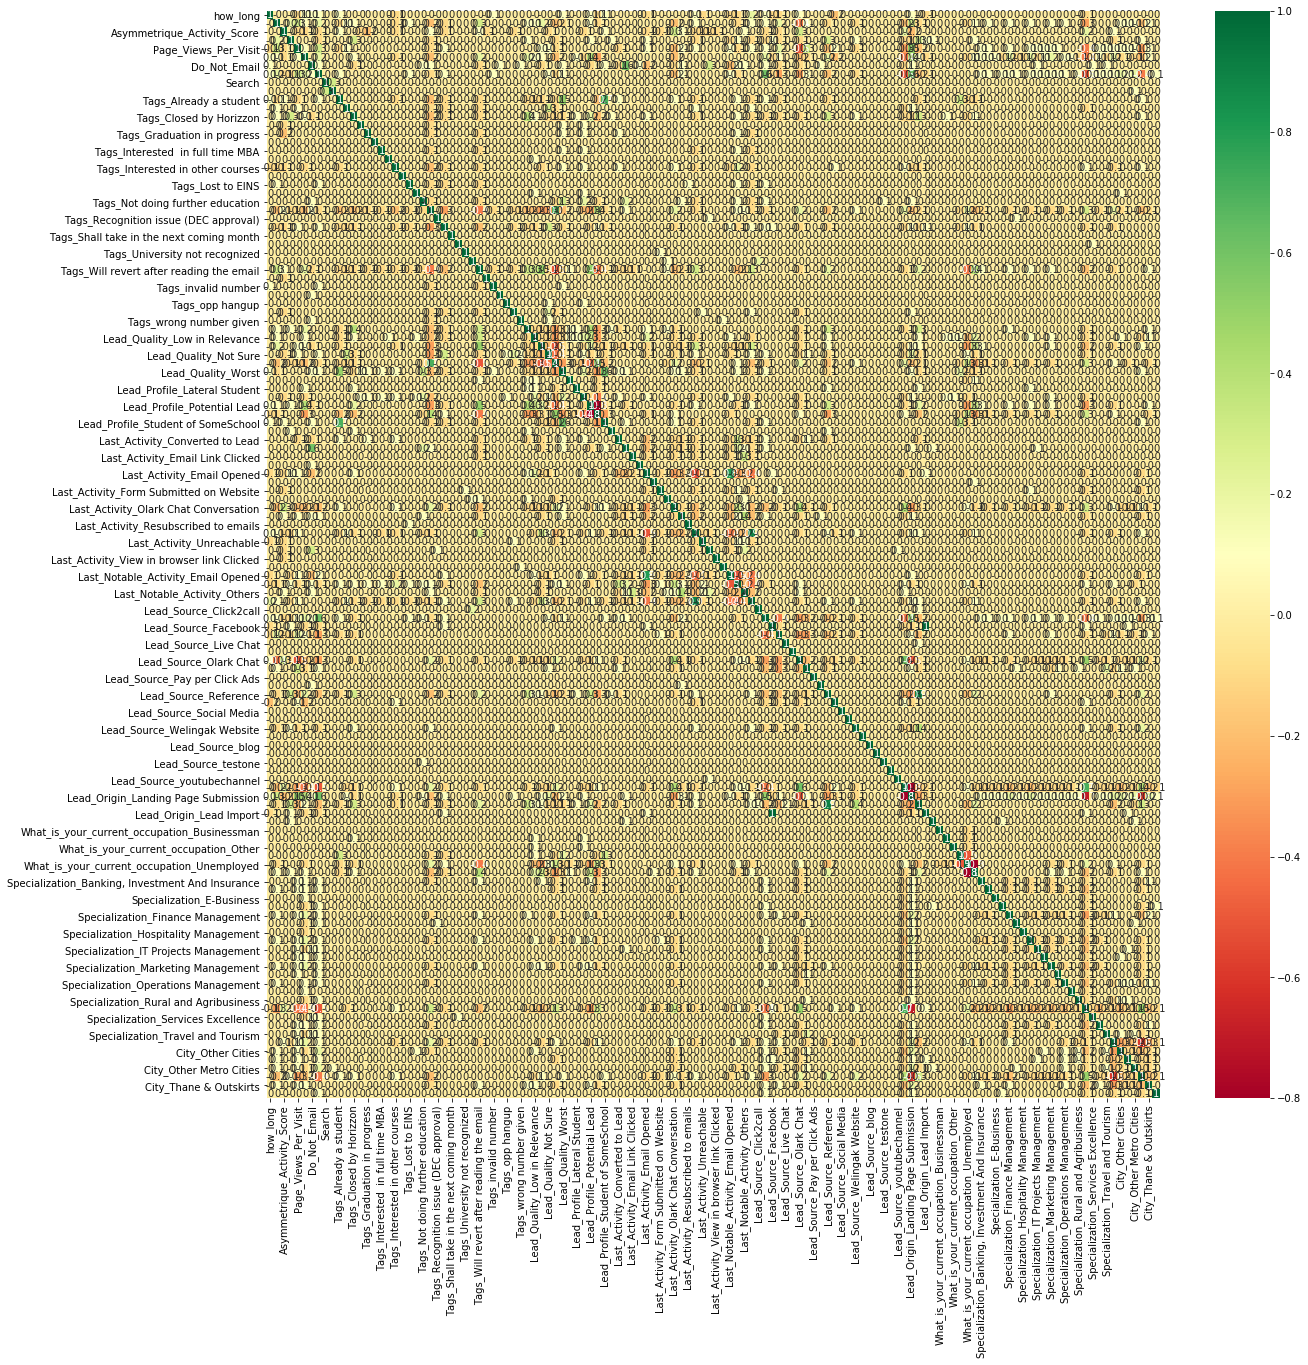

In [156]:
#check correlation
corrmat = lead_data_selected_vars.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [157]:
#drop correlated columns
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9 or corrmat.iloc[i,j] <= -0.9:
            if columns[j]:
                columns[j] = False
selected_columns = lead_data_selected_vars.columns[columns]
lead_data_selected_vars = lead_data_selected_vars[selected_columns]

In [158]:
target=lead_data['Converted']

In [159]:
#split_data
x_train, x_test, y_train, y_test = train_test_split(lead_data_selected_vars.values,target.values, test_size = 0.2)

In [160]:
#normalization using standard scaler
scaler = StandardScaler()   
scaler=scaler.fit(x_train)
pickle.dump(scaler,open('scaler.pkl','wb'))

scaler=pickle.load(open('scaler.pkl','rb'))
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [193]:
#-------------------training
f1_score_cv=[]
f1_score_test=[]
for name,clf in zip(names,classifiers):
    print(name, model)
    #clf.fit(x_train, y_train)
    score=cross_val_score(clf, x_train, y_train, cv=5, scoring='f1')
    print('f1',score.mean())
    f1_score_cv.append(score.mean())
    logger.info('Scored classifier {} as {}'.format(name,score))
    print()
    y_pred=clf.predict(x_test)
    print('F1 score on_test: ',f1_score(y_test,y_pred))
    f1_score_test.append(f1_score(y_test,y_pred))
    logger.info(confusion_matrix(y_test, y_pred))
    print()
    logger.info(classification_report(y_test, y_pred))

XGB GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
     

2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937 0.93171997 0.92887746]
2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937 0.93171997 0.92887746]
2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937 0.93171997 0.92887746]
2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937 0.93171997 0.92887746]
2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937 0.93171997 0.92887746]
2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937 0.93171997 0.92887746]
2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937 0.93171997 0.92887746]
2020-12-19 00:21:58,075 - CHURN_PRED - INFO - Scored classifier XGB as [0.92228864 0.93298969 0.93138937

f1 0.9294530254538216

F1 score on_test:  0.9360505973295855

GBM GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                

2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857 0.92682927 0.90678733]
2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857 0.92682927 0.90678733]
2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857 0.92682927 0.90678733]
2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857 0.92682927 0.90678733]
2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857 0.92682927 0.90678733]
2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857 0.92682927 0.90678733]
2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857 0.92682927 0.90678733]
2020-12-19 00:22:12,894 - CHURN_PRED - INFO - Scored classifier GBM as [0.92609083 0.91823899 0.92142857

       100           0.2904            0.00s
f1 0.9198749983775203

F1 score on_test:  0.9222873900293255

Neural Net GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                

Iteration 199, loss = 0.04098212
Iteration 200, loss = 0.04038784
Iteration 201, loss = 0.04062367
Iteration 202, loss = 0.03999926
Iteration 203, loss = 0.03960939
Iteration 204, loss = 0.03916882
Iteration 205, loss = 0.03908757
Iteration 206, loss = 0.03836984
Iteration 207, loss = 0.03808282
Iteration 208, loss = 0.03757690
Iteration 209, loss = 0.03756578
Iteration 210, loss = 0.03736041
Iteration 211, loss = 0.03695840
Iteration 212, loss = 0.03637395
Iteration 213, loss = 0.03671764
Iteration 214, loss = 0.03594335
Iteration 215, loss = 0.03581999
Iteration 216, loss = 0.03519773
Iteration 217, loss = 0.03528263
Iteration 218, loss = 0.03504737
Iteration 219, loss = 0.03448435
Iteration 220, loss = 0.03439137
Iteration 221, loss = 0.03416091
Iteration 222, loss = 0.03419185
Iteration 223, loss = 0.03410191
Iteration 224, loss = 0.03325416
Iteration 225, loss = 0.03319663
Iteration 226, loss = 0.03258089
Iteration 227, loss = 0.03274711
Iteration 228, loss = 0.03240018
Iteration 

Iteration 11, loss = 0.16059334
Iteration 12, loss = 0.15996606
Iteration 13, loss = 0.15920077
Iteration 14, loss = 0.15849303
Iteration 15, loss = 0.15849634
Iteration 16, loss = 0.15755510
Iteration 17, loss = 0.15707803
Iteration 18, loss = 0.15688046
Iteration 19, loss = 0.15607431
Iteration 20, loss = 0.15628134
Iteration 21, loss = 0.15643080
Iteration 22, loss = 0.15530068
Iteration 23, loss = 0.15522619
Iteration 24, loss = 0.15472419
Iteration 25, loss = 0.15474622
Iteration 26, loss = 0.15387210
Iteration 27, loss = 0.15334260
Iteration 28, loss = 0.15305650
Iteration 29, loss = 0.15269031
Iteration 30, loss = 0.15229332
Iteration 31, loss = 0.15184131
Iteration 32, loss = 0.15147170
Iteration 33, loss = 0.15100416
Iteration 34, loss = 0.15031938
Iteration 35, loss = 0.15059249
Iteration 36, loss = 0.15017608
Iteration 37, loss = 0.14902380
Iteration 38, loss = 0.14909257
Iteration 39, loss = 0.14818725
Iteration 40, loss = 0.14754459
Iteration 41, loss = 0.14715806
Iteratio

Iteration 263, loss = 0.02781450
Iteration 264, loss = 0.02745420
Iteration 265, loss = 0.02704811
Iteration 266, loss = 0.02746703
Iteration 267, loss = 0.02730051
Iteration 268, loss = 0.02691128
Iteration 269, loss = 0.02671954
Iteration 270, loss = 0.02632829
Iteration 271, loss = 0.02652914
Iteration 272, loss = 0.02652838
Iteration 273, loss = 0.02647235
Iteration 274, loss = 0.02646330
Iteration 275, loss = 0.02670142
Iteration 276, loss = 0.02575536
Iteration 277, loss = 0.02595160
Iteration 278, loss = 0.02563253
Iteration 279, loss = 0.02578546
Iteration 280, loss = 0.02508463
Iteration 281, loss = 0.02508387
Iteration 282, loss = 0.02522660
Iteration 283, loss = 0.02509893
Iteration 284, loss = 0.02490107
Iteration 285, loss = 0.02555429
Iteration 286, loss = 0.02491205
Iteration 287, loss = 0.02457947
Iteration 288, loss = 0.02566291
Iteration 289, loss = 0.02449618
Iteration 290, loss = 0.02416960
Iteration 291, loss = 0.02448883
Iteration 292, loss = 0.02443430
Iteration 

Iteration 185, loss = 0.04426530
Iteration 186, loss = 0.04428637
Iteration 187, loss = 0.04373391
Iteration 188, loss = 0.04325671
Iteration 189, loss = 0.04285800
Iteration 190, loss = 0.04277118
Iteration 191, loss = 0.04244006
Iteration 192, loss = 0.04243856
Iteration 193, loss = 0.04176241
Iteration 194, loss = 0.04193891
Iteration 195, loss = 0.04104264
Iteration 196, loss = 0.04033469
Iteration 197, loss = 0.04066290
Iteration 198, loss = 0.04010842
Iteration 199, loss = 0.03985154
Iteration 200, loss = 0.04019109
Iteration 201, loss = 0.03904415
Iteration 202, loss = 0.03910652
Iteration 203, loss = 0.03844161
Iteration 204, loss = 0.03871209
Iteration 205, loss = 0.03803516
Iteration 206, loss = 0.03817027
Iteration 207, loss = 0.03783311
Iteration 208, loss = 0.03795636
Iteration 209, loss = 0.03695507
Iteration 210, loss = 0.03677284
Iteration 211, loss = 0.03649924
Iteration 212, loss = 0.03708512
Iteration 213, loss = 0.03610629
Iteration 214, loss = 0.03545039
Iteration 

Iteration 21, loss = 0.15909613
Iteration 22, loss = 0.15868031
Iteration 23, loss = 0.15745157
Iteration 24, loss = 0.15839975
Iteration 25, loss = 0.15768914
Iteration 26, loss = 0.15702258
Iteration 27, loss = 0.15678302
Iteration 28, loss = 0.15649804
Iteration 29, loss = 0.15612802
Iteration 30, loss = 0.15562232
Iteration 31, loss = 0.15520529
Iteration 32, loss = 0.15454551
Iteration 33, loss = 0.15443616
Iteration 34, loss = 0.15394646
Iteration 35, loss = 0.15407710
Iteration 36, loss = 0.15310671
Iteration 37, loss = 0.15270829
Iteration 38, loss = 0.15237631
Iteration 39, loss = 0.15226604
Iteration 40, loss = 0.15140009
Iteration 41, loss = 0.15060127
Iteration 42, loss = 0.14970305
Iteration 43, loss = 0.14927681
Iteration 44, loss = 0.14873544
Iteration 45, loss = 0.14794749
Iteration 46, loss = 0.14766027
Iteration 47, loss = 0.14682633
Iteration 48, loss = 0.14644212
Iteration 49, loss = 0.14553535
Iteration 50, loss = 0.14464987
Iteration 51, loss = 0.14398418
Iteratio

Iteration 273, loss = 0.02611011
Iteration 274, loss = 0.02620068
Iteration 275, loss = 0.02585118
Iteration 276, loss = 0.02623379
Iteration 277, loss = 0.02580956
Iteration 278, loss = 0.02540858
Iteration 279, loss = 0.02529031
Iteration 280, loss = 0.02518152
Iteration 281, loss = 0.02484514
Iteration 282, loss = 0.02581442
Iteration 283, loss = 0.02552387
Iteration 284, loss = 0.02455615
Iteration 285, loss = 0.02483412
Iteration 286, loss = 0.02465656
Iteration 287, loss = 0.02463482
Iteration 288, loss = 0.02482650
Iteration 289, loss = 0.02418652
Iteration 290, loss = 0.02436396
Iteration 291, loss = 0.02373144
Iteration 292, loss = 0.02434208
Iteration 293, loss = 0.02382174
Iteration 294, loss = 0.02418414
Iteration 295, loss = 0.02457144
Iteration 296, loss = 0.02413818
Iteration 297, loss = 0.02367194
Iteration 298, loss = 0.02363555
Iteration 299, loss = 0.02342557
Iteration 300, loss = 0.02335551
Iteration 301, loss = 0.02295430
Iteration 302, loss = 0.02303084
Iteration 

Iteration 94, loss = 0.10274069
Iteration 95, loss = 0.10193547
Iteration 96, loss = 0.10027837
Iteration 97, loss = 0.09956105
Iteration 98, loss = 0.09833009
Iteration 99, loss = 0.09726569
Iteration 100, loss = 0.09704467
Iteration 101, loss = 0.09642104
Iteration 102, loss = 0.09453407
Iteration 103, loss = 0.09360699
Iteration 104, loss = 0.09278289
Iteration 105, loss = 0.09164596
Iteration 106, loss = 0.09050604
Iteration 107, loss = 0.08988482
Iteration 108, loss = 0.08873910
Iteration 109, loss = 0.08760423
Iteration 110, loss = 0.08672131
Iteration 111, loss = 0.08550284
Iteration 112, loss = 0.08464006
Iteration 113, loss = 0.08470227
Iteration 114, loss = 0.08305995
Iteration 115, loss = 0.08201489
Iteration 116, loss = 0.08112154
Iteration 117, loss = 0.08035151
Iteration 118, loss = 0.07914355
Iteration 119, loss = 0.07865131
Iteration 120, loss = 0.07747388
Iteration 121, loss = 0.07667343
Iteration 122, loss = 0.07575657
Iteration 123, loss = 0.07558083
Iteration 124, l

Iteration 345, loss = 0.01713355
Iteration 346, loss = 0.01770587
Iteration 347, loss = 0.01756022
Iteration 348, loss = 0.01718363
Iteration 349, loss = 0.01674273
Iteration 350, loss = 0.01654323
Iteration 351, loss = 0.01675710
Iteration 352, loss = 0.01737724
Iteration 353, loss = 0.01648320
Iteration 354, loss = 0.01672080
Iteration 355, loss = 0.01664463
Iteration 356, loss = 0.01659118
Iteration 357, loss = 0.01652512
Iteration 358, loss = 0.01609459
Iteration 359, loss = 0.01651154
Iteration 360, loss = 0.01667766
Iteration 361, loss = 0.01619803
Iteration 362, loss = 0.01614214
Iteration 363, loss = 0.01612788
Iteration 364, loss = 0.01653446
Iteration 365, loss = 0.01644586
Iteration 366, loss = 0.01587207
Iteration 367, loss = 0.01573151
Iteration 368, loss = 0.01596049
Iteration 369, loss = 0.01572231
Iteration 370, loss = 0.01593494
Iteration 371, loss = 0.01690219
Iteration 372, loss = 0.01599348
Iteration 373, loss = 0.01607293
Iteration 374, loss = 0.01562873
Iteration 

2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored classifier Neural Net as [0.921875   0.91666667 0.91725352 0.92579505 0.92227074]
2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored classifier Neural Net as [0.921875   0.91666667 0.91725352 0.92579505 0.92227074]
2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored classifier Neural Net as [0.921875   0.91666667 0.91725352 0.92579505 0.92227074]
2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored classifier Neural Net as [0.921875   0.91666667 0.91725352 0.92579505 0.92227074]
2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored classifier Neural Net as [0.921875   0.91666667 0.91725352 0.92579505 0.92227074]
2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored classifier Neural Net as [0.921875   0.91666667 0.91725352 0.92579505 0.92227074]
2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored classifier Neural Net as [0.921875   0.91666667 0.91725352 0.92579505 0.92227074]
2020-12-19 00:24:55,036 - CHURN_PRED - INFO - Scored cl

Iteration 390, loss = 0.01527763
Iteration 391, loss = 0.01527858
Iteration 392, loss = 0.01496896
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
f1 0.9207721966310078

F1 score on_test: 

2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,068 - CHURN_PRED - INFO - [[1100   44]
 [  78  626]]
2020-12-19 00:24:55,092 - CHURN_PRED - INFO -               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1144
           1       0.93      0.89      0.91       704

    accuracy                           0.93      1848
   macro avg       0.93      0.93      0.93      1848
weighted avg       0.93      0.93      0.93      1848

2020-12-19 00:24:55,092 - CHURN_PRED - INFO

 0.9112081513828238

Naive Bayes GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                 

2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Scored classifier Naive Bayes as [0.71620756 0.77437722 0.83909181 0.79851852 0.8315482 ]
2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Scored classifier Naive Bayes as [0.71620756 0.77437722 0.83909181 0.79851852 0.8315482 ]
2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Scored classifier Naive Bayes as [0.71620756 0.77437722 0.83909181 0.79851852 0.8315482 ]
2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Scored classifier Naive Bayes as [0.71620756 0.77437722 0.83909181 0.79851852 0.8315482 ]
2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Scored classifier Naive Bayes as [0.71620756 0.77437722 0.83909181 0.79851852 0.8315482 ]
2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Scored classifier Naive Bayes as [0.71620756 0.77437722 0.83909181 0.79851852 0.8315482 ]
2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Scored classifier Naive Bayes as [0.71620756 0.77437722 0.83909181 0.79851852 0.8315482 ]
2020-12-19 00:24:55,340 - CHURN_PRED - INFO - Sc

f1 0.7919486614253601

F1 score on_test:  0.8446943078004214

Decision Tree GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
      

2020-12-19 00:24:55,692 - CHURN_PRED - INFO - Scored classifier Decision Tree as [0.85605338 0.85363551 0.85849057 0.86206897 0.85333333]
2020-12-19 00:24:55,692 - CHURN_PRED - INFO - Scored classifier Decision Tree as [0.85605338 0.85363551 0.85849057 0.86206897 0.85333333]
2020-12-19 00:24:55,692 - CHURN_PRED - INFO - Scored classifier Decision Tree as [0.85605338 0.85363551 0.85849057 0.86206897 0.85333333]
2020-12-19 00:24:55,692 - CHURN_PRED - INFO - Scored classifier Decision Tree as [0.85605338 0.85363551 0.85849057 0.86206897 0.85333333]
2020-12-19 00:24:55,692 - CHURN_PRED - INFO - Scored classifier Decision Tree as [0.85605338 0.85363551 0.85849057 0.86206897 0.85333333]
2020-12-19 00:24:55,692 - CHURN_PRED - INFO - Scored classifier Decision Tree as [0.85605338 0.85363551 0.85849057 0.86206897 0.85333333]
2020-12-19 00:24:55,692 - CHURN_PRED - INFO - Scored classifier Decision Tree as [0.85605338 0.85363551 0.85849057 0.86206897 0.85333333]
2020-12-19 00:24:55,692 - CHURN_PR

f1 0.8567163508514589

F1 score on_test:  0.855151045701007

Random Forest GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
       

2020-12-19 00:24:57,743 - CHURN_PRED - INFO - Scored classifier Random Forest as [0.86445498 0.81346154 0.84291188 0.8713615  0.834766  ]
2020-12-19 00:24:57,743 - CHURN_PRED - INFO - Scored classifier Random Forest as [0.86445498 0.81346154 0.84291188 0.8713615  0.834766  ]
2020-12-19 00:24:57,743 - CHURN_PRED - INFO - Scored classifier Random Forest as [0.86445498 0.81346154 0.84291188 0.8713615  0.834766  ]
2020-12-19 00:24:57,743 - CHURN_PRED - INFO - Scored classifier Random Forest as [0.86445498 0.81346154 0.84291188 0.8713615  0.834766  ]
2020-12-19 00:24:57,743 - CHURN_PRED - INFO - Scored classifier Random Forest as [0.86445498 0.81346154 0.84291188 0.8713615  0.834766  ]
2020-12-19 00:24:57,743 - CHURN_PRED - INFO - Scored classifier Random Forest as [0.86445498 0.81346154 0.84291188 0.8713615  0.834766  ]
2020-12-19 00:24:57,743 - CHURN_PRED - INFO - Scored classifier Random Forest as [0.86445498 0.81346154 0.84291188 0.8713615  0.834766  ]
2020-12-19 00:24:57,743 - CHURN_PR

f1 0.845391178519338

F1 score on_test:  0.8395061728395061

Nearest Neighbors GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
   

2020-12-19 00:25:07,862 - CHURN_PRED - INFO - Scored classifier Nearest Neighbors as [0.85607477 0.81256133 0.83349374 0.82352941 0.8137931 ]
2020-12-19 00:25:07,862 - CHURN_PRED - INFO - Scored classifier Nearest Neighbors as [0.85607477 0.81256133 0.83349374 0.82352941 0.8137931 ]
2020-12-19 00:25:07,862 - CHURN_PRED - INFO - Scored classifier Nearest Neighbors as [0.85607477 0.81256133 0.83349374 0.82352941 0.8137931 ]
2020-12-19 00:25:07,862 - CHURN_PRED - INFO - Scored classifier Nearest Neighbors as [0.85607477 0.81256133 0.83349374 0.82352941 0.8137931 ]
2020-12-19 00:25:07,862 - CHURN_PRED - INFO - Scored classifier Nearest Neighbors as [0.85607477 0.81256133 0.83349374 0.82352941 0.8137931 ]
2020-12-19 00:25:07,862 - CHURN_PRED - INFO - Scored classifier Nearest Neighbors as [0.85607477 0.81256133 0.83349374 0.82352941 0.8137931 ]
2020-12-19 00:25:07,862 - CHURN_PRED - INFO - Scored classifier Nearest Neighbors as [0.85607477 0.81256133 0.83349374 0.82352941 0.8137931 ]
2020-1

f1 0.8278904720389055



2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,381 - CHURN_PRED - INFO - [[1099   45]
 [ 164  540]]
2020-12-19 00:25:10,405 - CHURN_PRED - INFO -               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1144
           1       0.92      0.77      0.84       704

    accuracy                           0.89      1848
   macro avg       0.90      0.86      0.88      1848
weighted avg       0.89      0.89      0.88      1848

2020-12-19 00:25:10,405 - CHURN_PRED - INFO

F1 score on_test:  0.8378588052754073

LogisticRegression GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                        

2020-12-19 00:25:11,297 - CHURN_PRED - INFO - Scored classifier LogisticRegression as [0.92013889 0.91240243 0.91364421 0.91637631 0.91021127]
2020-12-19 00:25:11,297 - CHURN_PRED - INFO - Scored classifier LogisticRegression as [0.92013889 0.91240243 0.91364421 0.91637631 0.91021127]
2020-12-19 00:25:11,297 - CHURN_PRED - INFO - Scored classifier LogisticRegression as [0.92013889 0.91240243 0.91364421 0.91637631 0.91021127]
2020-12-19 00:25:11,297 - CHURN_PRED - INFO - Scored classifier LogisticRegression as [0.92013889 0.91240243 0.91364421 0.91637631 0.91021127]
2020-12-19 00:25:11,297 - CHURN_PRED - INFO - Scored classifier LogisticRegression as [0.92013889 0.91240243 0.91364421 0.91637631 0.91021127]
2020-12-19 00:25:11,297 - CHURN_PRED - INFO - Scored classifier LogisticRegression as [0.92013889 0.91240243 0.91364421 0.91637631 0.91021127]
2020-12-19 00:25:11,297 - CHURN_PRED - INFO - Scored classifier LogisticRegression as [0.92013889 0.91240243 0.91364421 0.91637631 0.91021127]

f1 0.9145546211449218

F1 score on_test:  0.9228591648973815



In [197]:
f1_score_test

[0.9360505973295855,
 0.9222873900293255,
 0.9112081513828238,
 0.8446943078004214,
 0.855151045701007,
 0.8395061728395061,
 0.8378588052754073,
 0.9228591648973815]

In [198]:
#------------------------voting classifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn import svm, neighbors
from xgboost import XGBClassifier

ensemble = [XGBClassifier(verbose=False), RandomForestClassifier(), svm.NuSVC(probability=True), 
           LogisticRegression(penalty='l2',class_weight='balanced', random_state=0, 
                                        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0,
                                        warm_start=False, n_jobs=None, l1_ratio=None)]

classifiers_with_names = []
_ = [classifiers_with_names.append((clf.__class__.__name__, clf)) for clf in ensemble]
voting = VotingClassifier(classifiers_with_names, voting='hard')

cv_results = cross_validate(voting, x_train, y_train, cv=5)
print(cv_results['test_score'].mean())

voting.fit(x_train, y_train)
predictions = voting.predict(x_test)
print('F1 score on_test: ',f1_score(y_test,predictions))

0.9373637785103309
F1 score on_test:  0.9169783096484667


In [217]:
#using XGB as best F1 score obtained for XGB on test set 
parameters = {'max_depth':[5,7],'min_samples_split':[2,3], 'max_features':[3,4],'n_estimators':[100,500],
                 'max_delta_step':[2,3], 'scale_pos_weight':[5,10]}

model=XGBClassifier()
model = GridSearchCV(model, param_grid=parameters,cv=5,verbose=1,scoring='f1')

print(model)
model.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_delta_step': [2, 3], 'max_depth': [5, 7],
                         'max_features': [3, 4], 'min_samples_split': [2, 3],
                         'n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
model_cv=model.best_estimator_

print(model_cv)

In [ ]:

print('f1',f1_score(y_test,model_cv.predict(x_test))